<a href="https://colab.research.google.com/github/aashasandeep/Twitter_disaster_classification-Project-7/blob/main/Task_1_twitter_disaster_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task: Data Exploration
How to Achieve: - Load the dataset of 10,000 hand-classified tweets. - Explore the dataset&#39;s structure using Python libraries like Pandas to understand the
columns and data types. - Visualize the distribution of classes (disaster vs. non-disaster tweets) using histograms or
bar plots. - Analyze the frequency of keywords and phrases associated with disaster tweets.

### **NLP Project for Disaster Tweet Classification**

#**Importing** **liabraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string, math, os, re, time, random

from tqdm import tqdm

# visualizations
plt.style.use('ggplot')

# natural language processing
from collections import defaultdict
import wordcloud

# ignore warnings because they are annoying
import warnings
warnings.filterwarnings('ignore')

# for neural nets
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Reading Dataset

● Load the dataset of 10,000 hand-classified tweets

In [ ]:
df = pd.read_csv('/content/twitter_disaster.csv')

# Part 1: Data Exploration and Preparation

Task: Data Exploration



In [ ]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")

This dataset has 7613 rows and 5 columns


In [ ]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [ ]:
import nltk
import re
from nltk.corpus import stopwords # Import the stopwords corpus
from nltk.stem import PorterStemmer

# Download stopwords if you haven't already
nltk.download('stopwords')

stop = stopwords.words('english')
stemmer = PorterStemmer()

def clean_text(text):
    processed_text = re.sub(r"(@\[A-Za-z0-9]+)|([^A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    processed_text = processed_text.lower()
    processed_text = [word for word in processed_text.split() if word not in (stop)]
    processed_text = " ".join([stemmer.stem(word) for word in processed_text])
    return processed_text

def preprocessing(df):
    df.keyword.fillna("", inplace=True)
    df.location.fillna("", inplace=True)
    df.text = df.keyword + df.location + df.text
    df.text = df.text.apply(lambda text: clean_text(text))
    df.drop(columns=["keyword", "location"], inplace=True)
    return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [ ]:
df.target.value_counts()

,count
target,
0,4342
1,3271


# ● Visualize the distribution of classes (disaster vs. non-disaster tweets) using histograms or bar plots.

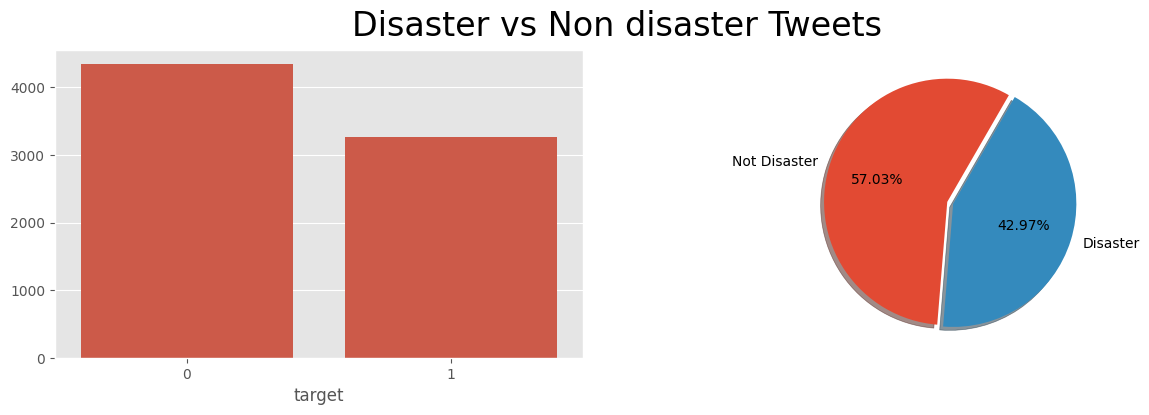

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15,4), dpi=100)
sns.barplot(x=df['target'].value_counts().index, y=df['target'].value_counts().values, ax=axes[0])
axes[1].pie(df['target'].value_counts(),
            labels=['Not Disaster', 'Disaster'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
# Use suptitle to add a title to the entire figure
fig.suptitle('Disaster vs Non disaster Tweets', fontsize=24)
plt.show()

# There are more tweets with class 0 (No disaster) than class 1 (disaster tweets)

● Analyze the frequency of keywords and phrases associated with disaster tweets.

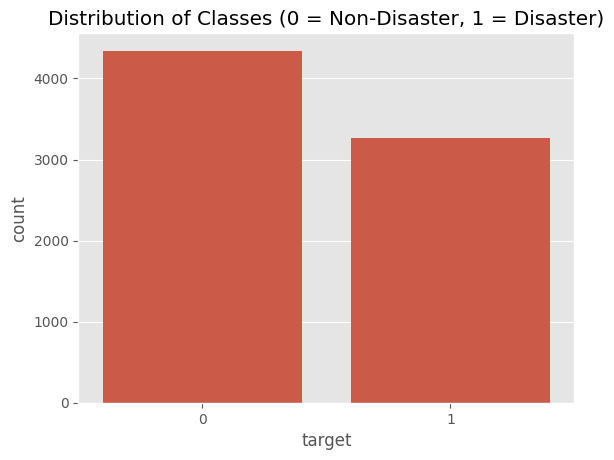

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of classes
sns.countplot(x='target', data=df)
plt.title("Distribution of Classes (0 = Non-Disaster, 1 = Disaster)")
plt.show()


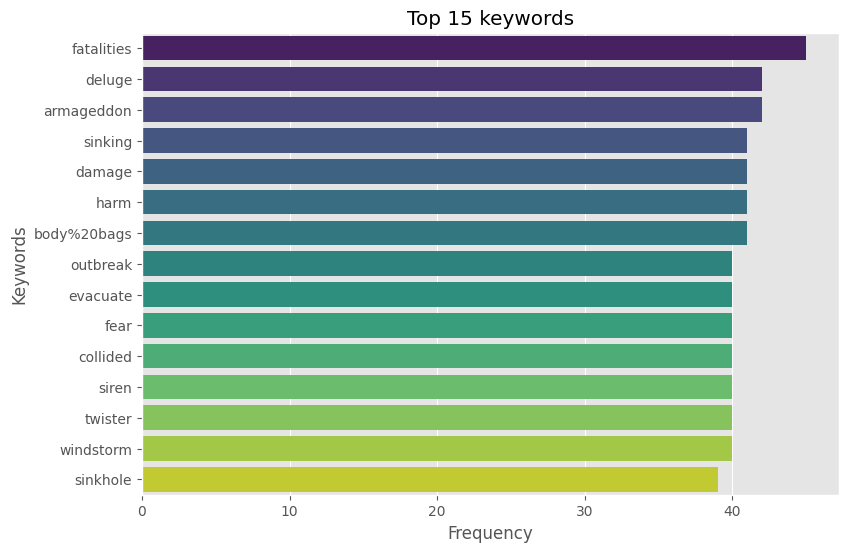

In [ ]:
# most common keywords
top_keywords = df.keyword.value_counts().iloc[:15]

custom_palette = sns.color_palette("viridis", len(top_keywords))

# plotting
plt.figure(figsize = (9,6))
sns.countplot(y = df.keyword, order = top_keywords.index, palette = custom_palette)
plt.title('Top 15 keywords')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.show()

#This is the frequency of keywords and phrases with Disaster tweets

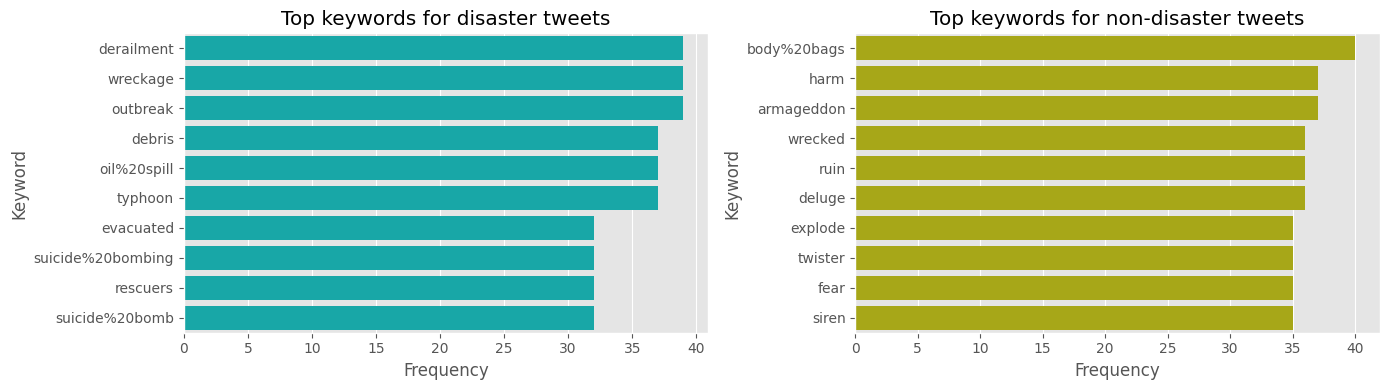

In [ ]:
disaster = df[df.target == 1].keyword.value_counts().head(10)
non_disaster = df[df.target == 0].keyword.value_counts().head(10)

plt.figure(figsize = (14,4))

# plotting for disaster tweets
plt.subplot(121)
sns.barplot(x = disaster.values, y = disaster.index, color = 'c')
plt.title('Top keywords for disaster tweets')
plt.xlabel('Frequency')
plt.ylabel('Keyword')

# plotting for non-disaster tweets
plt.subplot(122)
sns.barplot(x = non_disaster.values, y = non_disaster.index, color = 'y')
plt.title('Top keywords for non-disaster tweets')
plt.xlabel('Frequency')
plt.ylabel('Keyword')

plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [ ]:
# fill missing with 'unknown'
df['keyword'] = df['keyword'].fillna('unknown')
df['location'] = df['location'].fillna('none')

# add keywords to text
df['text'] = df['text'] + ' ' + df['keyword']

# drop id and keyword
columns = ['id', 'keyword']
df = df.drop(columns = columns)

In [ ]:
df.isnull().sum()

,0
location,0
text,0
target,0


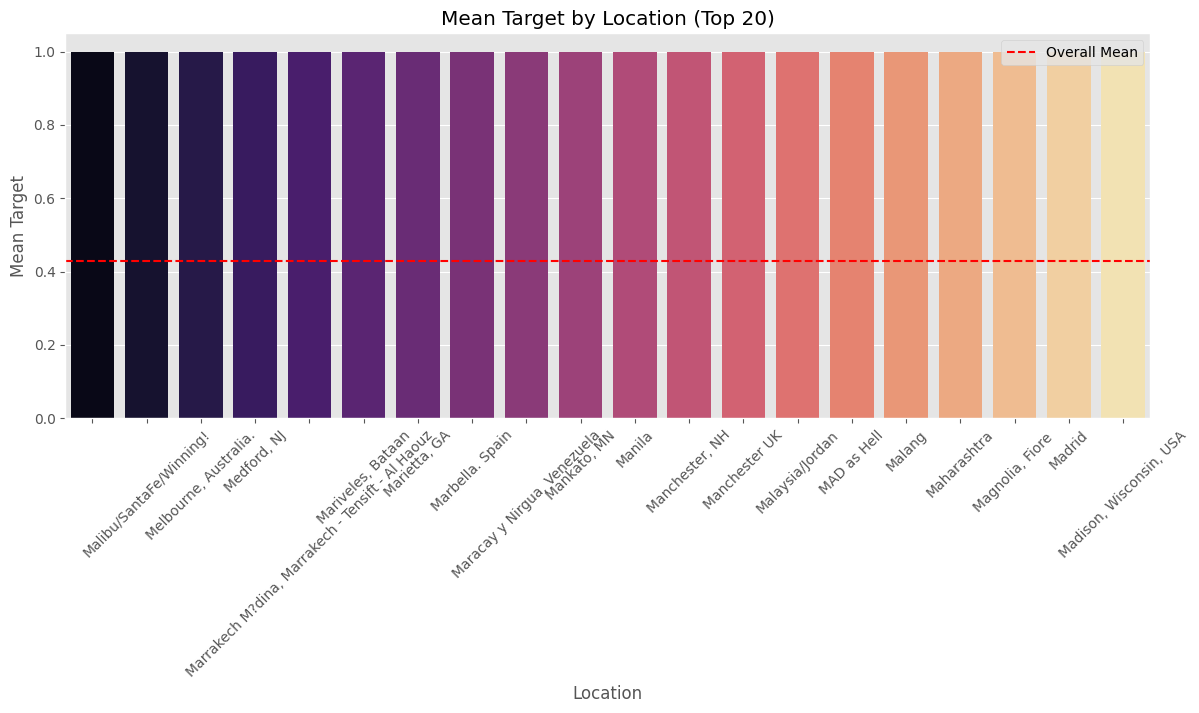

In [ ]:
top_20 = df.groupby('location')['target'].mean().sort_values(ascending=False).head(20)

# creating custom color palette
num_bars = len(top_20)
custom_palette = sns.color_palette('magma', num_bars)

# plotting
plt.figure(figsize=(14,5))
sns.barplot(x=top_20.index, y=top_20.values, palette= custom_palette)
plt.axhline(np.mean(df['target']), color = 'red', linestyle = '--', label = 'Overall Mean')
plt.xticks(rotation=45)
plt.title('Mean Target by Location (Top 20)')
plt.xlabel('Location')
plt.ylabel('Mean Target')
plt.legend()
plt.show()

# Here we have grouped Target and Location to calculate top 20

Adding more features

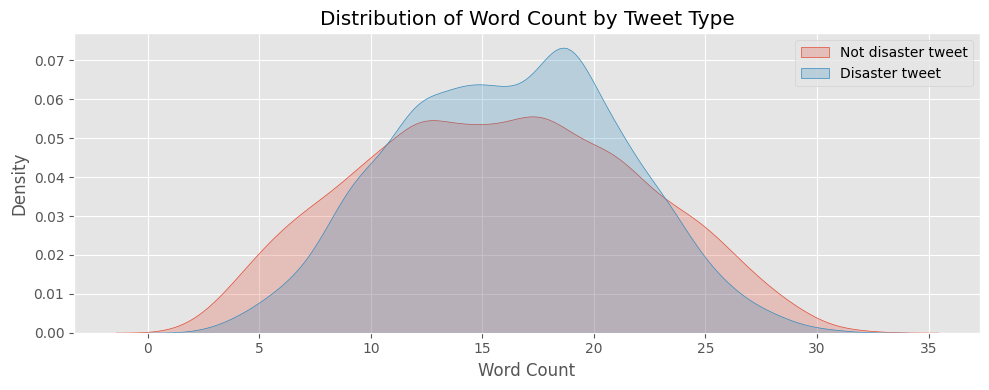

In [ ]:
df['word count'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 4))

# Plot KDE plots for 'word count' based on 'target' values
sns.kdeplot(df['word count'][df['target'] == 0], fill=True, label='Not disaster tweet')
sns.kdeplot(df['word count'][df['target'] == 1], fill=True, label='Disaster tweet')

# Set title, labels, and legend
plt.title('Distribution of Word Count by Tweet Type')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

#Disaster tweets are more from 15 to 20 word count category as compared to non disaster tweets

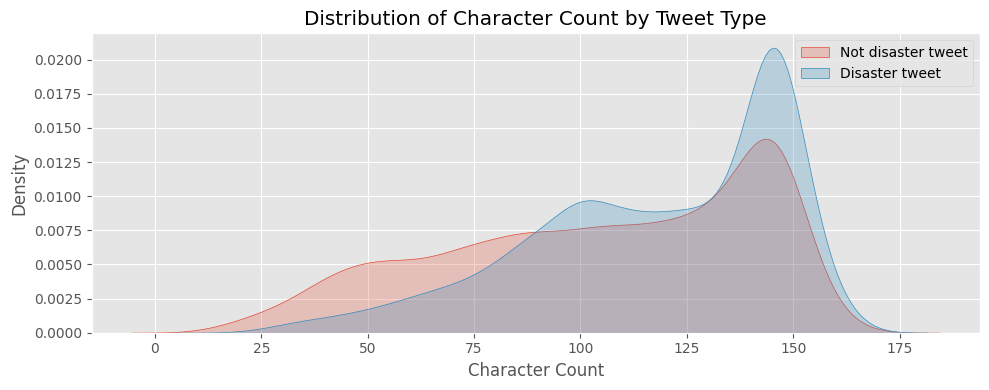

In [ ]:
df['character count'] = df['text'].apply(lambda x: len(x))

plt.figure(figsize=(10, 4))

# Plot KDE plots for 'word count' based on 'target' values
sns.kdeplot(df['character count'][df['target'] == 0], fill=True, label='Not disaster tweet')
sns.kdeplot(df['character count'][df['target'] == 1], fill=True, label='Disaster tweet')

# Set title, labels, and legend
plt.title('Distribution of Character Count by Tweet Type')
plt.xlabel('Character Count')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

#It tells us that very few disaster tweets are less than 50 characters and that the majority of them are more than 125 characters long

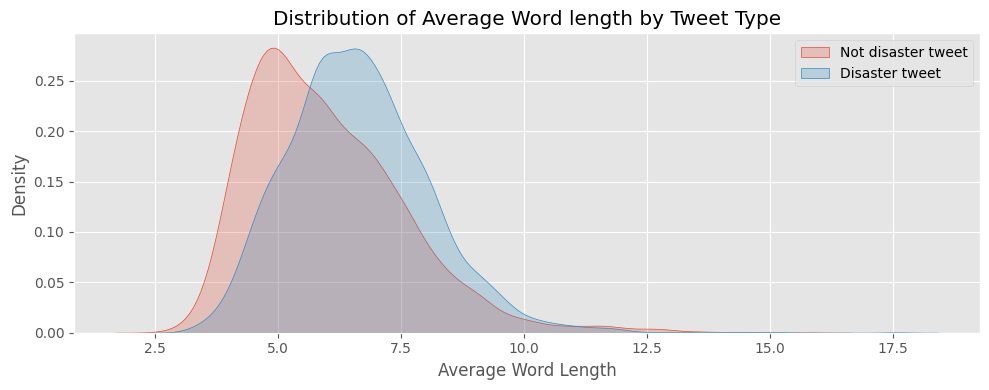

In [ ]:
# define function to find average word length
def avg_word_length(x):
    x = x.split()
    return np.mean([len(i) for i in x])

df['average word length'] = df['text'].apply(avg_word_length)

plt.figure(figsize=(10, 4))

# Plot KDE plots for 'word count' based on 'target' values
sns.kdeplot(df['average word length'][df['target'] == 0], fill=True, label='Not disaster tweet')
sns.kdeplot(df['average word length'][df['target'] == 1], fill=True, label='Disaster tweet')

# Set title, labels, and legend
plt.title('Distribution of Average Word length by Tweet Type')
plt.xlabel('Average Word Length')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import wordcloud

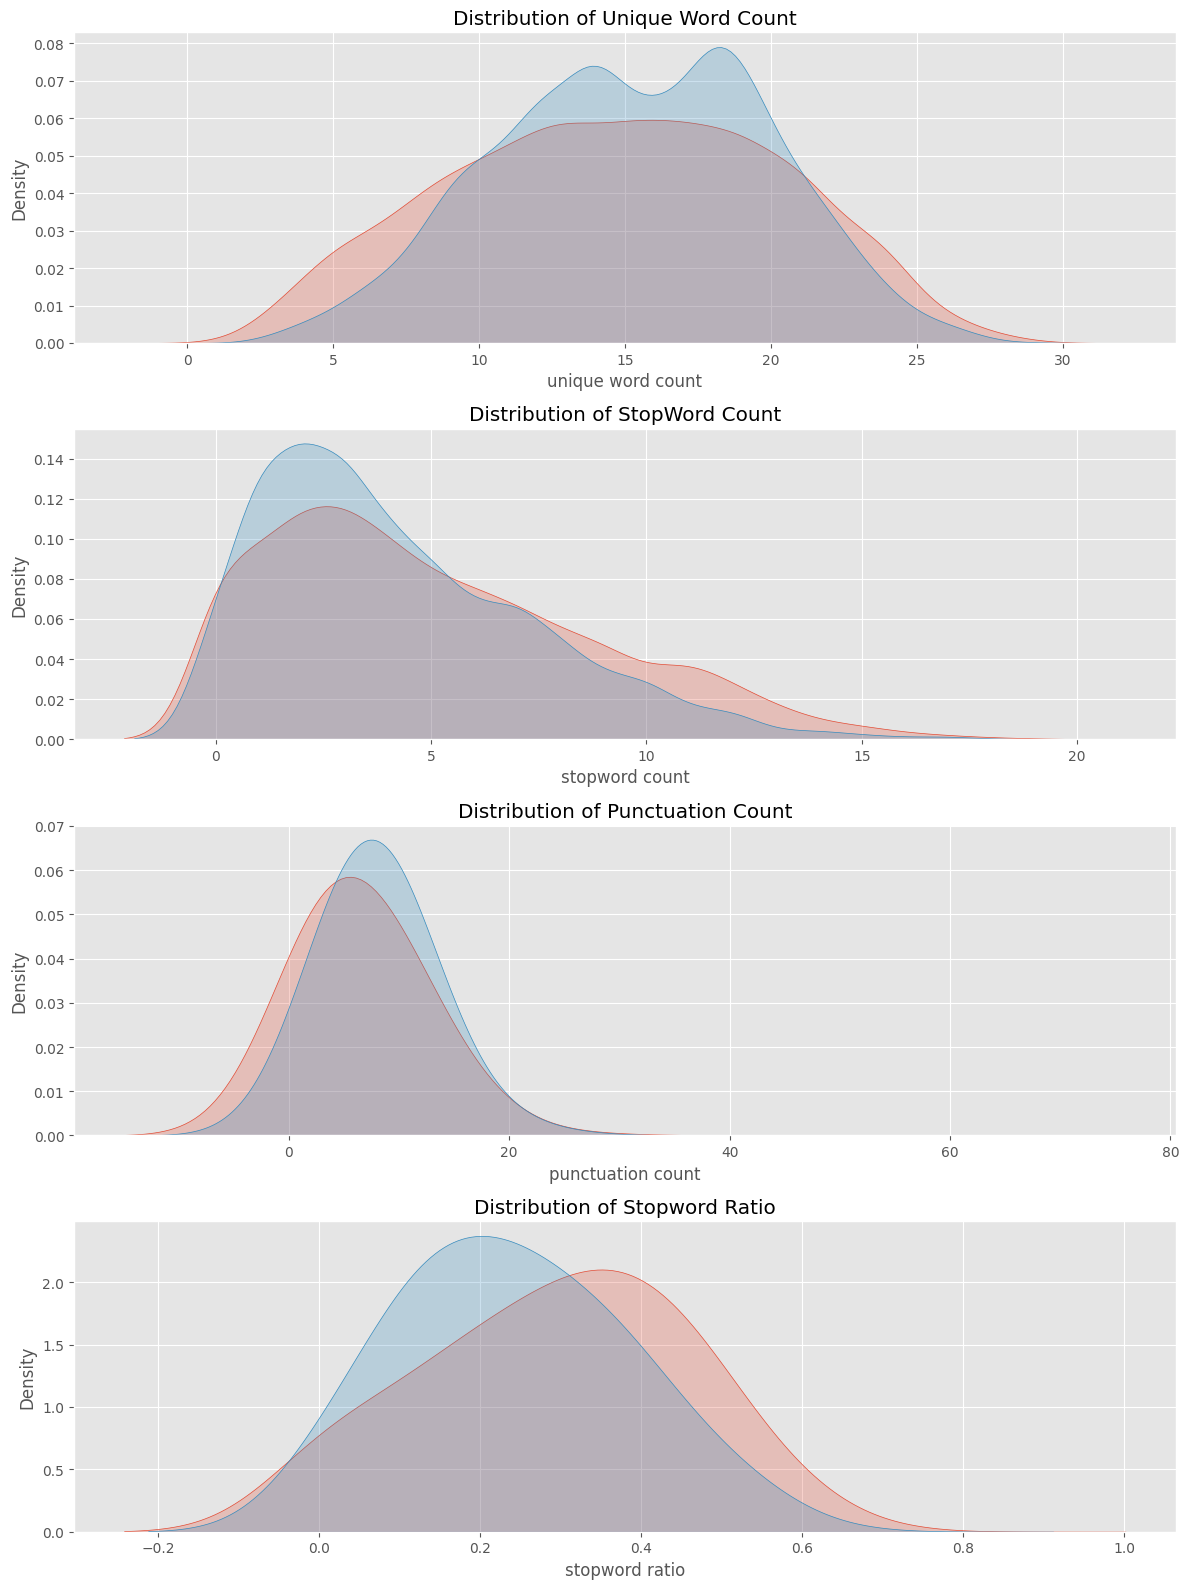

In [ ]:
# adding unique word count
df['unique word count'] = df['text'].apply(lambda x: len(set(x.split())))

# adding stopword co
df['stopword count'] = df['text'].apply(lambda x: len([i for i in x.lower().split() if i in wordcloud.STOPWORDS]))

# adding url count
df['url count'] = df['text'].apply(lambda x: len([i for i in x.lower().split() if 'http' in i or 'https' in i]))

# adding mention count
df['mention count'] = df['text'].apply(lambda x: len([i for i in str(x) if i == '@']))

# adding hashtag count
df['hashtag count'] = df['text'].apply(lambda x: len([i for i in str(x) if i == '#']))

# adding stopword ratio
df['stopword ratio'] = df['stopword count'] / df['word count']

# adding punctuation count
df['punctuation count'] = df['text'].apply(lambda x: len([i for i in str(x) if i in string.punctuation]))

df = df[:len(df)]
disaster = df['target'] == 1

# graphs to visualize newly added features
fig, axes = plt.subplots(4, figsize = (12,16))

graph1 = sns.kdeplot(df.loc[~disaster]['unique word count'], fill=True, label = 'Not Disaster', ax=axes[0])
graph1 = sns.kdeplot(df.loc[disaster]['unique word count'], fill=True, label = 'Disasater', ax=axes[0])
graph1.set_title('Distribution of Unique Word Count')

graph2 = sns.kdeplot(df.loc[~disaster]['stopword count'], fill=True, label = 'Not Disaster', ax=axes[1])
graph2 = sns.kdeplot(df.loc[disaster]['stopword count'], fill=True, label = 'Disasater', ax=axes[1])
graph2.set_title('Distribution of StopWord Count')

graph3 = sns.kdeplot(df.loc[~disaster]['punctuation count'], fill=True, label = 'Not Disaster', ax=axes[2], bw=1)
graph3 = sns.kdeplot(df.loc[disaster]['punctuation count'], fill=True, label = 'Disasater', ax=axes[2], bw=1)
graph3.set_title('Distribution of Punctuation Count')

graph4 = sns.kdeplot(df.loc[~disaster]['stopword ratio'], fill=True, label = 'Not Disaster', ax=axes[3], bw=0.5)
graph4 = sns.kdeplot(df.loc[disaster]['stopword ratio'], fill=True, label = 'Disasater', ax=axes[3], bw=0.5)
graph4.set_title('Distribution of Stopword Ratio')

fig.tight_layout()
plt.show()

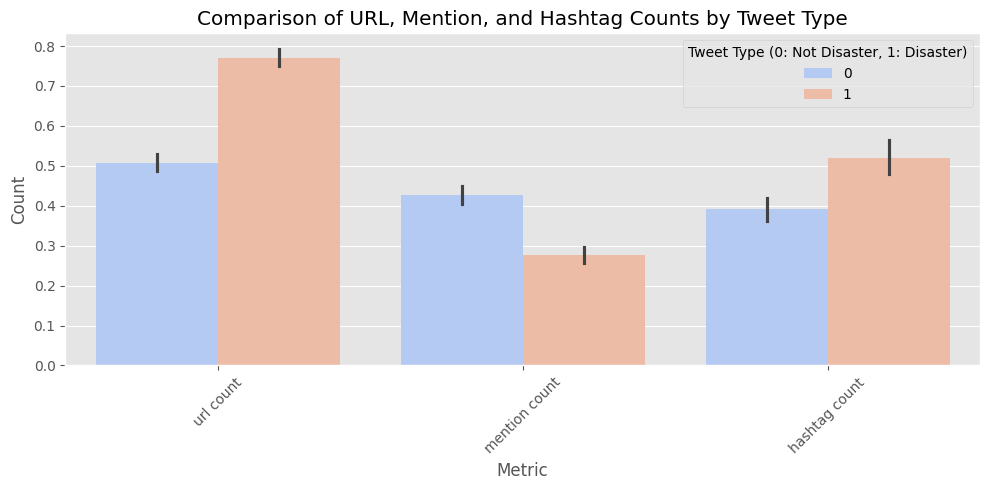

In [ ]:
# Melting the DataFrame to plot multiple count metrics
df_melted = df.melt(id_vars=['target'], value_vars=['url count', 'mention count', 'hashtag count'],
                     var_name='metric', value_name='count')

# Set up the figure and axis
plt.figure(figsize=(10, 5))

# Plotting barplot for each count metric with 'target' as hue
sns.barplot(x='metric', y='count', hue='target', data=df_melted, palette='coolwarm', alpha=1)

# Adding labels and title
plt.xlabel('Metric')
plt.ylabel('Count')
plt.title('Comparison of URL, Mention, and Hashtag Counts by Tweet Type')

# Show the legend
plt.legend(title='Tweet Type (0: Not Disaster, 1: Disaster)')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#URL counts in Disaster and non-disaster tweets are maximum followed by Hashtag and Mention count

# Step 1: Clean the Text Data
First, we need to remove unnecessary characters, URLs, punctuation, etc.

# ● Clean the text data by removing special characters, URLs, and punctuation marks.

CLEANING We can do most of the hard work with Keras's Tokenize object, which automatically converts all words to lowercase and filters out punctuation**

This tokenizer has many arguements that allow us to do most of the cleaning with one line of code, so we do not need to much processing ourselves. I have included some examples of how one would manually clean text for reference:

In [ ]:
# import required modules
import re
import string
import pandas as pd
from wordcloud import WordCloud, STOPWORDS # Import STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# remove punctuation
def remove_punctuation(x):
    return x.translate(str.maketrans('', '', string.punctuation))

# remove urls
def remove_urls(x):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', x)

# remove html
def remove_html(x):
    html = re.compile(r'<.*?>')
    return html.sub(r'', x)

# remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
# remove stopwords
def remove_stopwords(x):
    return ' '.join([i for i in x.split() if i not in STOPWORDS]) # Access STOPWORDS directly

# remove words less than 4
def remove_less_than(x):
    return ' '.join([i for i in x.split() if len(i) > 3])

# remove words with non-alphabet characters
def remove_non_alphabet(x):
    return ' '.join([i for i in x.split() if i.isalpha()])

def strip_all_entities(x):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())

# Applying helper functions

df['text_clean'] = df['text'].apply(lambda x: remove_urls(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_emoji(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_html(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_punctuation(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_stopwords(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_less_than(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_non_alphabet(x))
df['text_clean'] = df['text_clean'].apply(lambda x: strip_all_entities(x))
df['text_clean'] = df['text_clean'].apply(lambda x: x.lower())
df['text_clean'] = df['text_clean'].apply(lambda x: x.strip())

In [ ]:
# checking strip_all_entities function
strip_all_entities('#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires'
)

'RockyFire Update California Hwy 20 closed in both directions due to Lake County fire CAfire wildfires'

#Here we have strip all entities means all the extra things in the sentence have been removed

We can even spellcheck the words

In [ ]:
# installing autocorrect
!pip install autocorrect

In [ ]:
from autocorrect import Speller

def spell_check(x):
    spell = Speller(lang='en')
    corrected_words = [spell(word) for word in x.split()]
    corrected_sentence = ' '.join(corrected_words)

    return corrected_sentence

wrong_spelled = 'this is my sevanth prooject'
corrected_sentence = spell_check(wrong_spelled)

print('Original Sentence:', wrong_spelled)
print('Corrected Sentence:', corrected_sentence)

Original Sentence: this is my sevanth prooject
Corrected Sentence: this is my seventh project


# With this speller, we can correct the spellings

# ● Tokenize the text into individual words or tokens.

[('the', 1051), ('in', 1037), ('of', 888), ('a', 730), ('to', 706), ('and', 462), ('-', 389), ('on', 386), ('for', 368), ('is', 302), ('at', 273), ('I', 259), ('The', 257), ('by', 244), ('from', 206), ('A', 167), ('that', 166), ('with', 159), ('was', 158), ('are', 150), ('it', 143), ('after', 140), ('as', 139), ('have', 134), ('fire', 119), ('via', 115), ('this', 110), ('my', 107), ('over', 107), ('...', 106), ('&amp;', 105), ('you', 103), ('be', 103), ('has', 98), ('been', 93), ('In', 90), ('who', 89), ('??', 88), ('California', 86), ('killed', 86), ('like', 85), ('an', 84), ('people', 83), ('up', 83), ('bombing', 83), ('than', 82), ('fatal', 78), ('when', 75), ('not', 74), ('debris', 74), ('disaster', 74), ('outbreak', 74), ('police', 73), ('but', 73), ('suicide', 71), ('bomb', 70), ('into', 69), ('were', 69), ('no', 68), ('crash', 67), ('2', 67), ('More', 66), ('just', 65), ('about', 64), ('will', 64), ('attack', 63), ('This', 61), ('burning', 60), ('injured', 59), ('wildfire', 59),

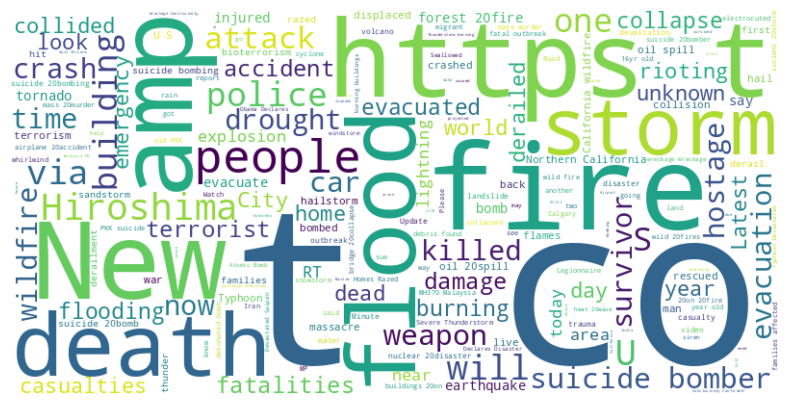

In [ ]:
from collections import Counter # Import Counter from collections module
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter disaster tweets
disaster_tweets = df[df['target'] == 1]['text']

# Tokenize words and count frequencies
disaster_words = ' '.join(disaster_tweets)
word_freq = Counter(disaster_words.split()) # Now Counter is defined and can be used

# Display the most common words
print(word_freq.most_common(1000))

# Visualize with a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(disaster_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Step 2: Tokenize the Text
After cleaning, tokenize the text into individual words.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

df['tokens'] = df['text'].apply(word_tokenize)
print(df[['text', 'tokens']])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                   text  \
0     Our Deeds are the Reason of this #earthquake M...   
1        Forest fire near La Ronge Sask. Canada unknown   
2     All residents asked to 'shelter in place' are ...   
3     13,000 people receive #wildfires evacuation or...   
4     Just got sent this photo from Ruby #Alaska as ...   
...                                                 ...   
7608  Two giant cranes holding a bridge collapse int...   
7609  @aria_ahrary @TheTawniest The out of control w...   
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...   
7611  Police investigating after an e-bike collided ...   
7612  The Latest: More Homes Razed by Northern Calif...   

                                                 tokens  
0     [Our, Deeds, are, the, Reason, of, this, #, ea...  
1     [Forest, fire, near, La, Ronge, Sask, ., Canad...  
2     [All, residents, asked, to, 'shelter, in, plac...  
3     [13,000, people, receive, #, wildfires, evacua...  
4

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def spacy_tokenizer(text):
    doc = nlp(text)
    return [token.text for token in doc]

df['tokens'] = df['text'].apply(spacy_tokenizer)
print(df[['text', 'tokens']])


                                                   text  \
0     Our Deeds are the Reason of this #earthquake M...   
1        Forest fire near La Ronge Sask. Canada unknown   
2     All residents asked to 'shelter in place' are ...   
3     13,000 people receive #wildfires evacuation or...   
4     Just got sent this photo from Ruby #Alaska as ...   
...                                                 ...   
7608  Two giant cranes holding a bridge collapse int...   
7609  @aria_ahrary @TheTawniest The out of control w...   
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...   
7611  Police investigating after an e-bike collided ...   
7612  The Latest: More Homes Razed by Northern Calif...   

                                                 tokens  
0     [Our, Deeds, are, the, Reason, of, this, #, ea...  
1     [Forest, fire, near, La, Ronge, Sask, ., Canad...  
2     [All, residents, asked, to, ', shelter, in, pl...  
3     [13,000, people, receive, #, wildfires, evacua...  
4

# Step 3: Convert Text Labels to Numerical Format
Convert labels like "disaster" and "non-disaster" to numeric format.

In [ ]:
df['label'] = df['target'].apply(lambda x: 'disaster' if x == 1 else 'non-disaster')

In [ ]:
df['label'] = ['disaster', 'non-disaster'] * (len(df) // 2) + ['disaster'] * (len(df) % 2)

In [ ]:
label_map = {'disaster': 1, 'non-disaster': 0}
df['label_num'] = df['label'].map(label_map)
print(df[['label', 'label_num']])

             label  label_num
0         disaster          1
1     non-disaster          0
2         disaster          1
3     non-disaster          0
4         disaster          1
...            ...        ...
7608      disaster          1
7609  non-disaster          0
7610      disaster          1
7611  non-disaster          0
7612      disaster          1

[7613 rows x 2 columns]


# Step 4: Split Dataset into Training and Testing Sets
Finally, split the data for training and testing.

In [ ]:
from sklearn.model_selection import train_test_split

# Features and labels
X = df['tokens']
y = df['label_num']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 6090
Testing set size: 1523


#Total no of dataset shape is 7613 and 80% of it traninig set and 20% of it testing dataset like traing set  size is 6090 and testing set is 1523.

In [ ]:
# Display the training and testing sets
print("Training set:\n", X_train, "\n", y_train)
print("Testing set:\n", X_test, "\n", y_test)

Training set:
 4996    [Courageous, and, honest, analysis, of, need, ...
3263    [@ZachZaidman, @670TheScore, wld, b, a, shame,...
4907    [Tell, @BarackObama, to, rescind, medals, of, ...
2855    [Worried, about, how, the, CA, drought, might,...
4716    [@YoungHeroesID, Lava, Blast, &, amp, ;, Power...
                              ...                        
5226    [@Eganator2000, There, are, n't, many, Obliter...
5390    [just, had, a, panic, attack, bc, I, do, n't, ...
860     [Omron, HEM-712C, Automatic, Blood, Pressure, ...
7603    [Officials, say, a, quarantine, is, in, place,...
7270    [I, moved, to, England, five, years, ago, toda...
Name: tokens, Length: 6090, dtype: object 
 4996    1
3263    0
4907    0
2855    0
4716    1
       ..
5226    1
5390    1
860     1
7603    0
7270    1
Name: label_num, Length: 6090, dtype: int64
Testing set:
 2644    [So, you, have, a, new, weapon, that, can, cau...
2227    [The, f$&amp;@ing, things, I, do, for, #, GISH...
5448    [DT, @georg

In [ ]:
!pip install matplotlib-venn

In [ ]:
!pip install cartopy

In [ ]:
import nltk
#nltk.download()
from nltk.tokenize import word_tokenize

In [ ]:
# Replace the empty append() call with the path you want to add.
nltk.data.path.append('/path/to/your/nltk_data')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['tokenized'] = df['text_clean'].apply(lambda x: word_tokenize(x))

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras import Input
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer from tensorflow.keras.preprocessing.text

tweets = [tweet for tweet in df['text']]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences)
labels = df['target']
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 22360 unique tokens.
Shape of data tensor: (7613, 35)
Shape of label tensor: (7613,)


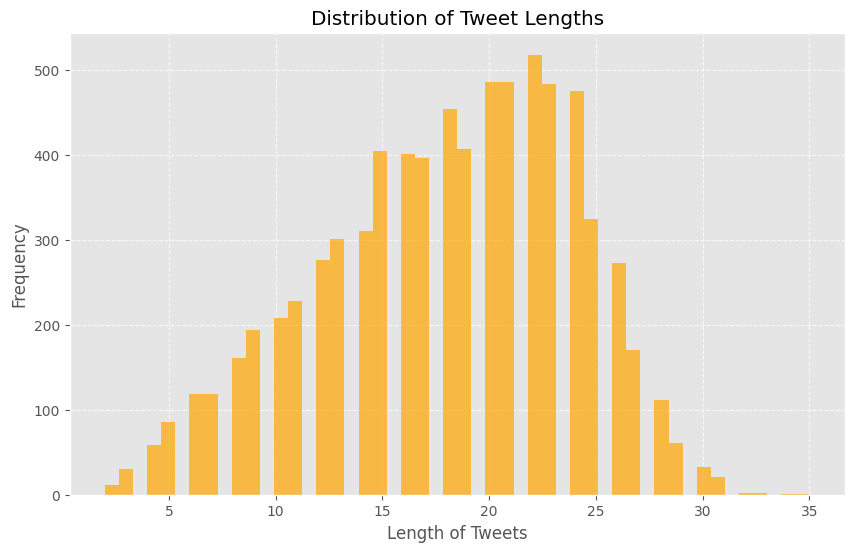

In [ ]:
# Visualizing tweet lengths with a custom color
plt.figure(figsize=(10, 6))
plt.hist([len(seq) for seq in sequences], bins=50, alpha=0.7, color='orange')  # Changed color to 'orange'
plt.xlabel('Length of Tweets')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed gridlines for better visibility
plt.show()


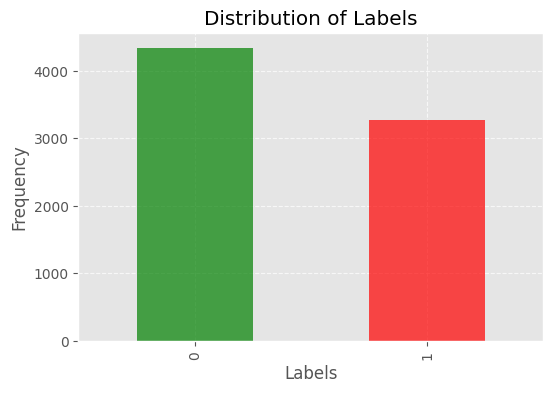

In [ ]:
# Visualizing label distribution with a custom color palette
plt.figure(figsize=(6, 4))
labels.value_counts().plot(kind='bar', color=['green', 'red'], alpha=0.7)  # Used green and red for bar colors
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import nltk

# Download the WordNet resource
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Example function for stemming and lemmatizing a list of tokens
def stem_and_lemmatize(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return stemmed_tokens, lemmatized_tokens

# Example usage on your tokenized text column
df['stemmed'], df['lemmatized'] = zip(*df['tokenized'].apply(stem_and_lemmatize))

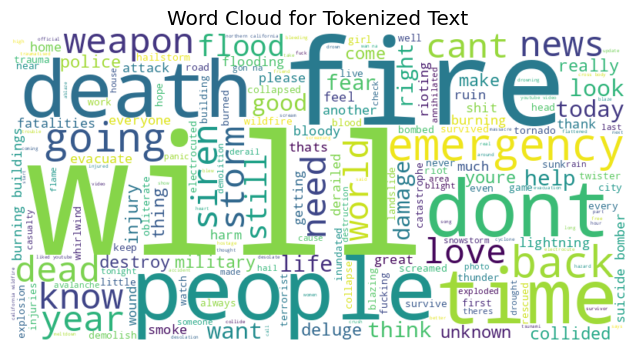

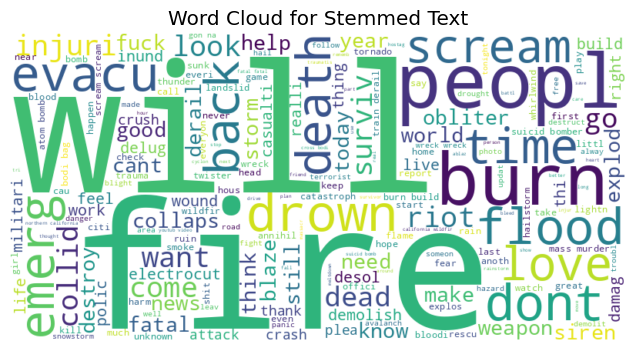

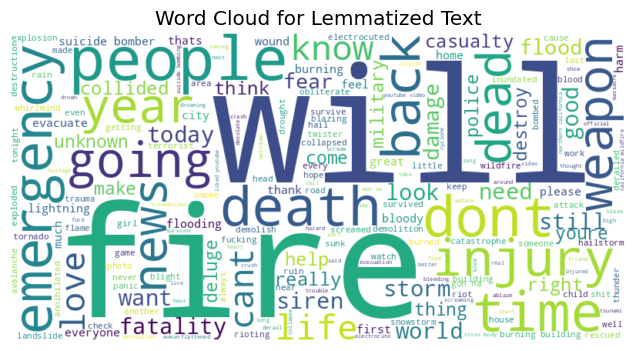

In [ ]:
from wordcloud import WordCloud

# Function to generate word cloud from list of strings
def generate_word_cloud_from_list(text_list, title):
    # Flatten the list of strings
    flattened_text = [word for sublist in text_list for word in sublist]

    # Join all strings in the flattened list into a single string
    text = ' '.join(flattened_text)

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot word cloud
    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for 'tokenized', 'stemmed', and 'lemmatized' columns
generate_word_cloud_from_list(df['tokenized'], "Word Cloud for Tokenized Text")
generate_word_cloud_from_list(df['stemmed'], "Word Cloud for Stemmed Text")
generate_word_cloud_from_list(df['lemmatized'], "Word Cloud for Lemmatized Text")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()

X_count = count_vectorizer.fit_transform(df['text'])
feature_names_count = count_vectorizer.get_feature_names_out()
print('Type of X_count:', type(X_count))
print('Shape of X_count:', X_count.shape)
print('Vocabulary (CountVectorizer):\n', feature_names_count)

tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(df['text'])
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
print('Type of X_tfidf:', type(X_tfidf))
print('Shape of X_tfidf:', X_tfidf.shape)
print('Vocabulary (Tfidf-Vectorizer):\n', feature_names_tfidf)

print("Transformed Feature Matrix (CountVectorizer):\n", X_count.toarray())
print("Transformed Feature Matrix (TF-IDF Vectorizer):\n", X_tfidf.toarray())

Type of X_count: <class 'scipy.sparse._csr.csr_matrix'>
Shape of X_count: (7613, 21557)
Vocabulary (CountVectorizer):
 ['00' '000' '0000' ... 'zztbvjypn1' 'zzweeezjug' 'zzzz']
Type of X_tfidf: <class 'scipy.sparse._csr.csr_matrix'>
Shape of X_tfidf: (7613, 21557)
Vocabulary (Tfidf-Vectorizer):
 ['00' '000' '0000' ... 'zztbvjypn1' 'zzweeezjug' 'zzzz']
Transformed Feature Matrix (CountVectorizer):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Transformed Feature Matrix (TF-IDF Vectorizer):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


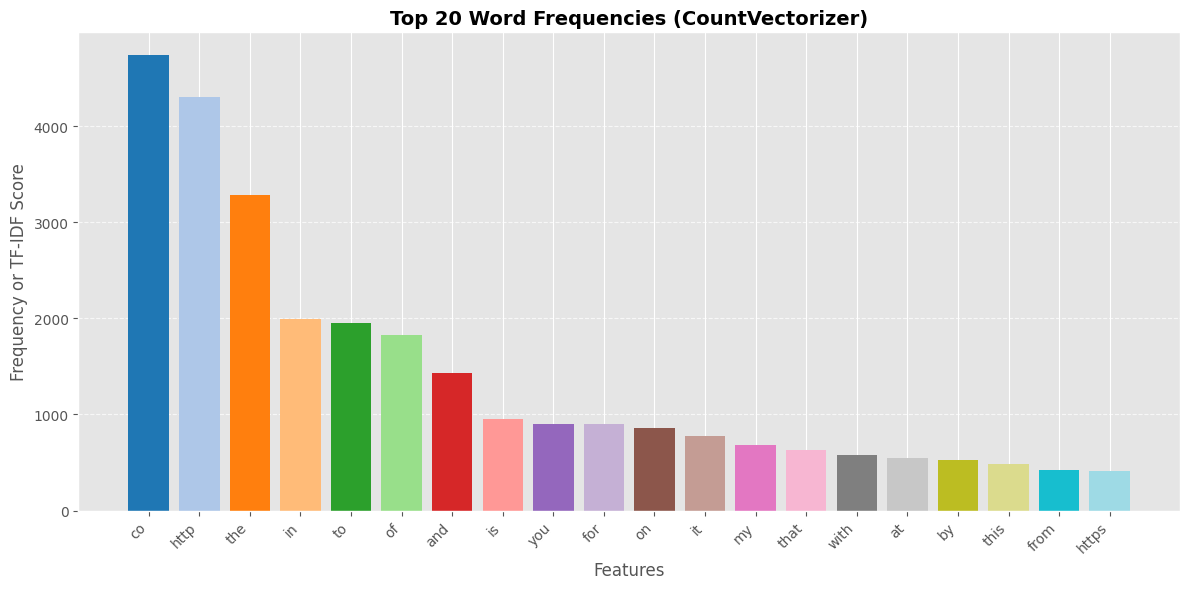

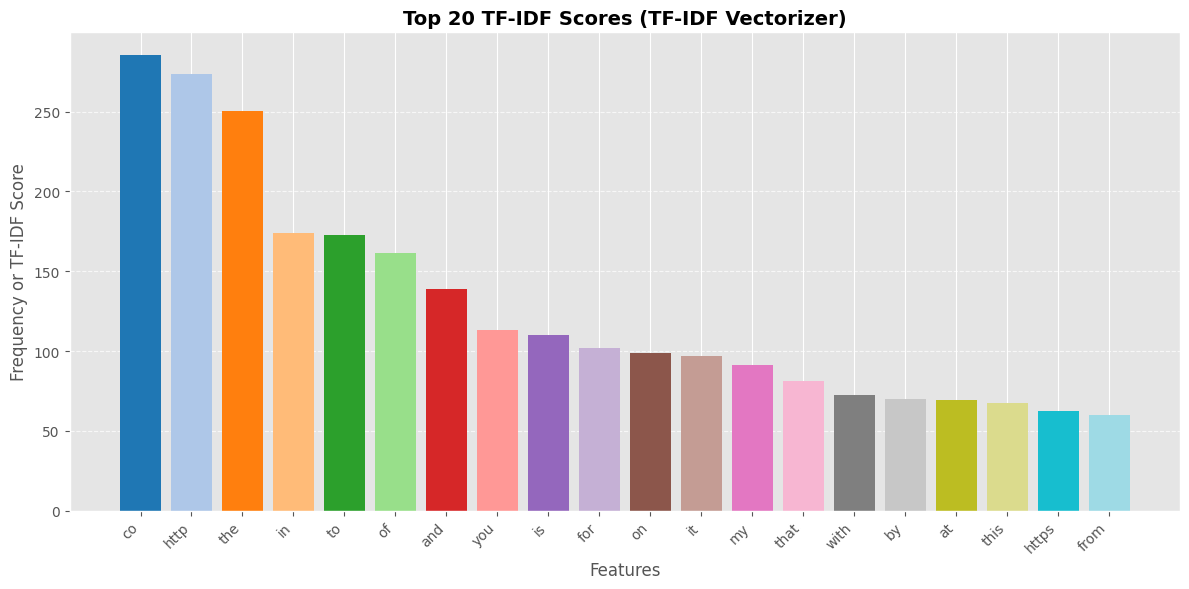

In [ ]:
# Function to plot histogram of word frequencies or TF-IDF scores
def plot_top_features(matrix, feature_names, title, top_n=20):
    # Calculate sum of frequencies/scores for each feature
    feature_sum = matrix.sum(axis=0).tolist()[0]

    # Sort feature names and corresponding sums
    sorted_features = [feature for _, feature in sorted(zip(feature_sum, feature_names), reverse=True)[:top_n]]
    sorted_sums = sorted(feature_sum, reverse=True)[:top_n]

    # Generate a color palette with custom colors
    colors = plt.cm.tab20(range(len(sorted_sums)))  # Use 'tab20' colormap for diverse colors

    # Plot histogram
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(sorted_sums)), sorted_sums, color=colors)  # Add color palette
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Frequency or TF-IDF Score', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xticks(range(len(sorted_sums)), sorted_features, rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
    plt.show()

# Plot top features for CountVectorizer and TF-IDF Vectorizer
plot_top_features(X_count, feature_names_count, 'Top 20 Word Frequencies (CountVectorizer)')
plot_top_features(X_tfidf, feature_names_tfidf, 'Top 20 TF-IDF Scores (TF-IDF Vectorizer)')


According to Count Vectorizer co and http are the words which are even more than 4000 in numbers followed by the, in, to, of, and

TF-IDF Vectorizer also shows the same result that co, http are maximum followed by the, in, to, of, and

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['location_numeric'] = label_encoder.fit_transform(df['location'])

In [ ]:
df.head(2)

,location,text,target,word count,character count,average word length,unique word count,stopword count,url count,mention count,...,stopword ratio,punctuation count,text_clean,tokens,label,label_num,tokenized,stemmed,lemmatized,location_numeric
0,none,Our Deeds are the Reason of this #earthquake M...,1,14,77,4.571429,14,6,0,0,...,0.428571,1,deeds reason earthquake allah forgive unknown,"[Our, Deeds, are, the, Reason, of, this, #, ea...",disaster,1,"[deeds, reason, earthquake, allah, forgive, un...","[deed, reason, earthquak, allah, forgiv, unknown]","[deed, reason, earthquake, allah, forgive, unk...",3171
1,none,Forest fire near La Ronge Sask. Canada unknown,1,8,46,4.875000,8,0,0,0,...,0.000000,1,forest fire near ronge sask canada unknown,"[Forest, fire, near, La, Ronge, Sask, ., Canad...",non-disaster,0,"[forest, fire, near, ronge, sask, canada, unkn...","[forest, fire, near, rong, sask, canada, unknown]","[forest, fire, near, ronge, sask, canada, unkn...",3171


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['target', 'text', 'location'], axis=1)
y = df['target']

In [ ]:
# saving dataset for task 2
df.to_csv('twitter_disaster_task2.csv')